In [20]:
#Import Dependencies and style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy.stats as stats

In [2]:
#Import database files and convert to dataframes and reduce to relevant data
flu_national_file = "Resources/flu_data_complete.csv"
flu_df = pd.read_csv(flu_national_file)
flu_df["TOTAL"]=(flu_df["TOTAL A"]+flu_df["TOTAL B"])
flu_df=flu_df[["YEAR","WEEK","TOTAL"]]
flu_df=flu_df[flu_df.YEAR!=2017]
flu_df.head()

flu_state_file="Resources/flu_data_state_2020.csv"
flu_state=pd.read_csv(flu_state_file)
flu_state=flu_state[flu_state.YEAR==2020]
flu_state["TOTAL A"]=flu_state["TOTAL A"].str.replace('X','0').astype(int)
flu_state["TOTAL B"]=flu_state["TOTAL B"].str.replace('X','0').astype(int)
flu_state["TOTAL"]=(flu_state["TOTAL A"]+flu_state["TOTAL B"])
flu_state=flu_state[["REGION","YEAR","WEEK","TOTAL"]]
flu_state.head()

,REGION,YEAR,WEEK,TOTAL
663,Alabama,2020,1,181
664,Alaska,2020,1,4
665,Arizona,2020,1,94
666,Arkansas,2020,1,73
667,California,2020,1,1186


In [3]:
#Create separate variables for each year of data
flu_2018=flu_df[flu_df["YEAR"]==2018]
flu_2019=flu_df[flu_df["YEAR"]==2019]
flu_2020=flu_df[flu_df["YEAR"]==2020]
flu_2021=flu_df[flu_df["YEAR"]==2021]
flu_2021=flu_df[flu_df["YEAR"]==2021]
flu_2022=flu_df[flu_df["YEAR"]==2022]
flu_2022.head()

,YEAR,WEEK,TOTAL
222,2022,1,3674
223,2022,2,2672
224,2022,3,2262
225,2022,4,1768
226,2022,5,1611


In [33]:
#Group flu data by year and sum total cases by year
flu_year=flu_df.groupby(["YEAR"])
flu_year_mean=flu_year["TOTAL"].mean()
flu_year_sum=flu_year["TOTAL"].sum()
years=["2018","2019","2020","2021","2022"]
flu_year_mean
#Determine if there is any statiscal difference between annual flu cases before COVID
anova_2018_2020=stats.f_oneway(flu_2018["TOTAL"],flu_2019["TOTAL"],flu_2020["TOTAL"])

#Determine if there is any statiscal difference between annual flu cases including COVID
anova_covid=stats.f_oneway(flu_2018["TOTAL"],flu_2019["TOTAL"],flu_2020["TOTAL"],flu_2021["TOTAL"])
print(anova_2018_2020)
print(anova_covid)



F_onewayResult(statistic=0.10062371088477606, pvalue=0.904332641055929)
F_onewayResult(statistic=4.9321614005034755, pvalue=0.0024987104718440113)


There is a statical difference betweent the number of flu cases after a full year into COVID pandemic, while for years previous there was no statiscal difference between annual flu cases.  The year 2020 is an interesting case because most of the 2020 flu season had already passed before any impact from the COVID pandemic was felt, so there no statical differnce between the number of yearly cases for 2020 compared to 2018 and 2019.  But there is a noticeable drop in flu cases in the latter part of the year once the pandemic was in full swing.

Both of these trends are demonstrated in the following two plots. 



<IPython.core.display.Javascript object>


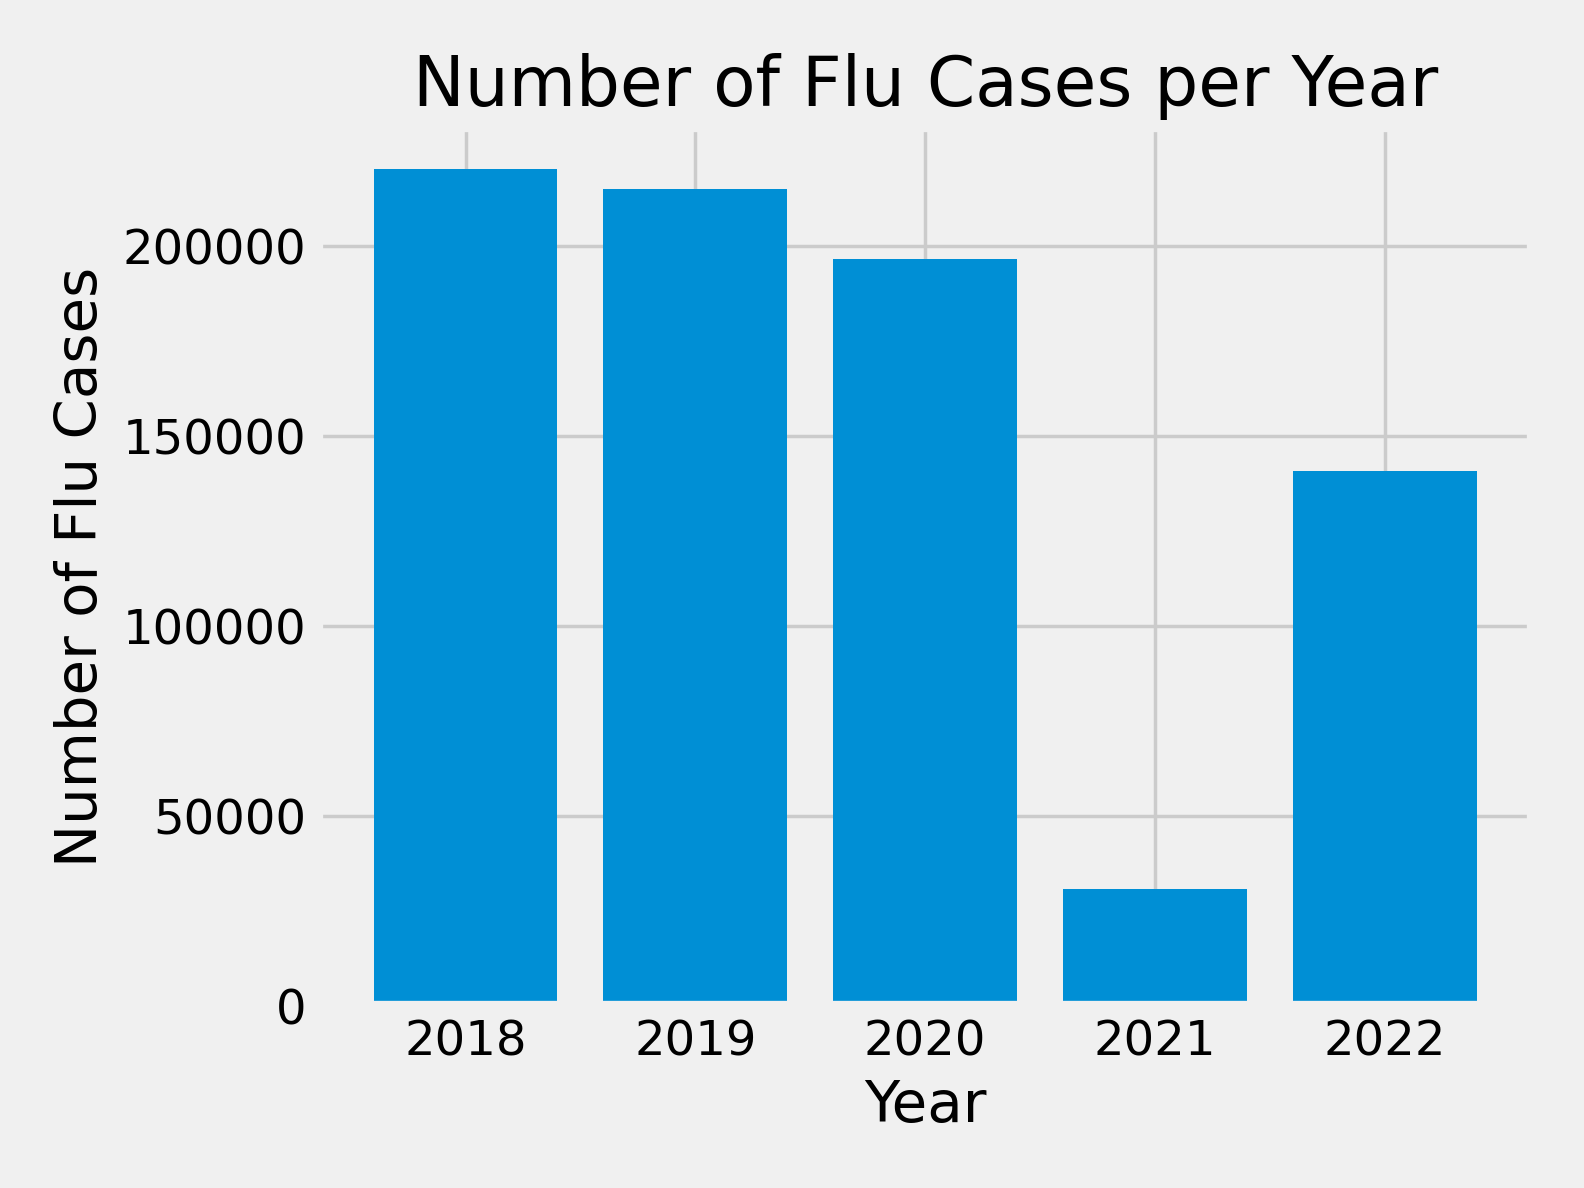

In [15]:
#Create Bar Graph of number of flu cases for each year from 2018-2022
from matplotlib import style
style.use('fivethirtyeight')
plt.figure(1)
plt.bar(years,flu_year_sum)
plt.title("Number of Flu Cases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Flu Cases")
plt.tight_layout()
plt.show()


The bar graph shows that there is no real change in yearly flu cases prior to the pandemic, but in 2021 there is a large drop in the number of cases.  A rebound can be seen on 2022, where cases are on pace to be back to the pre-COVID average.

<IPython.core.display.Javascript object>


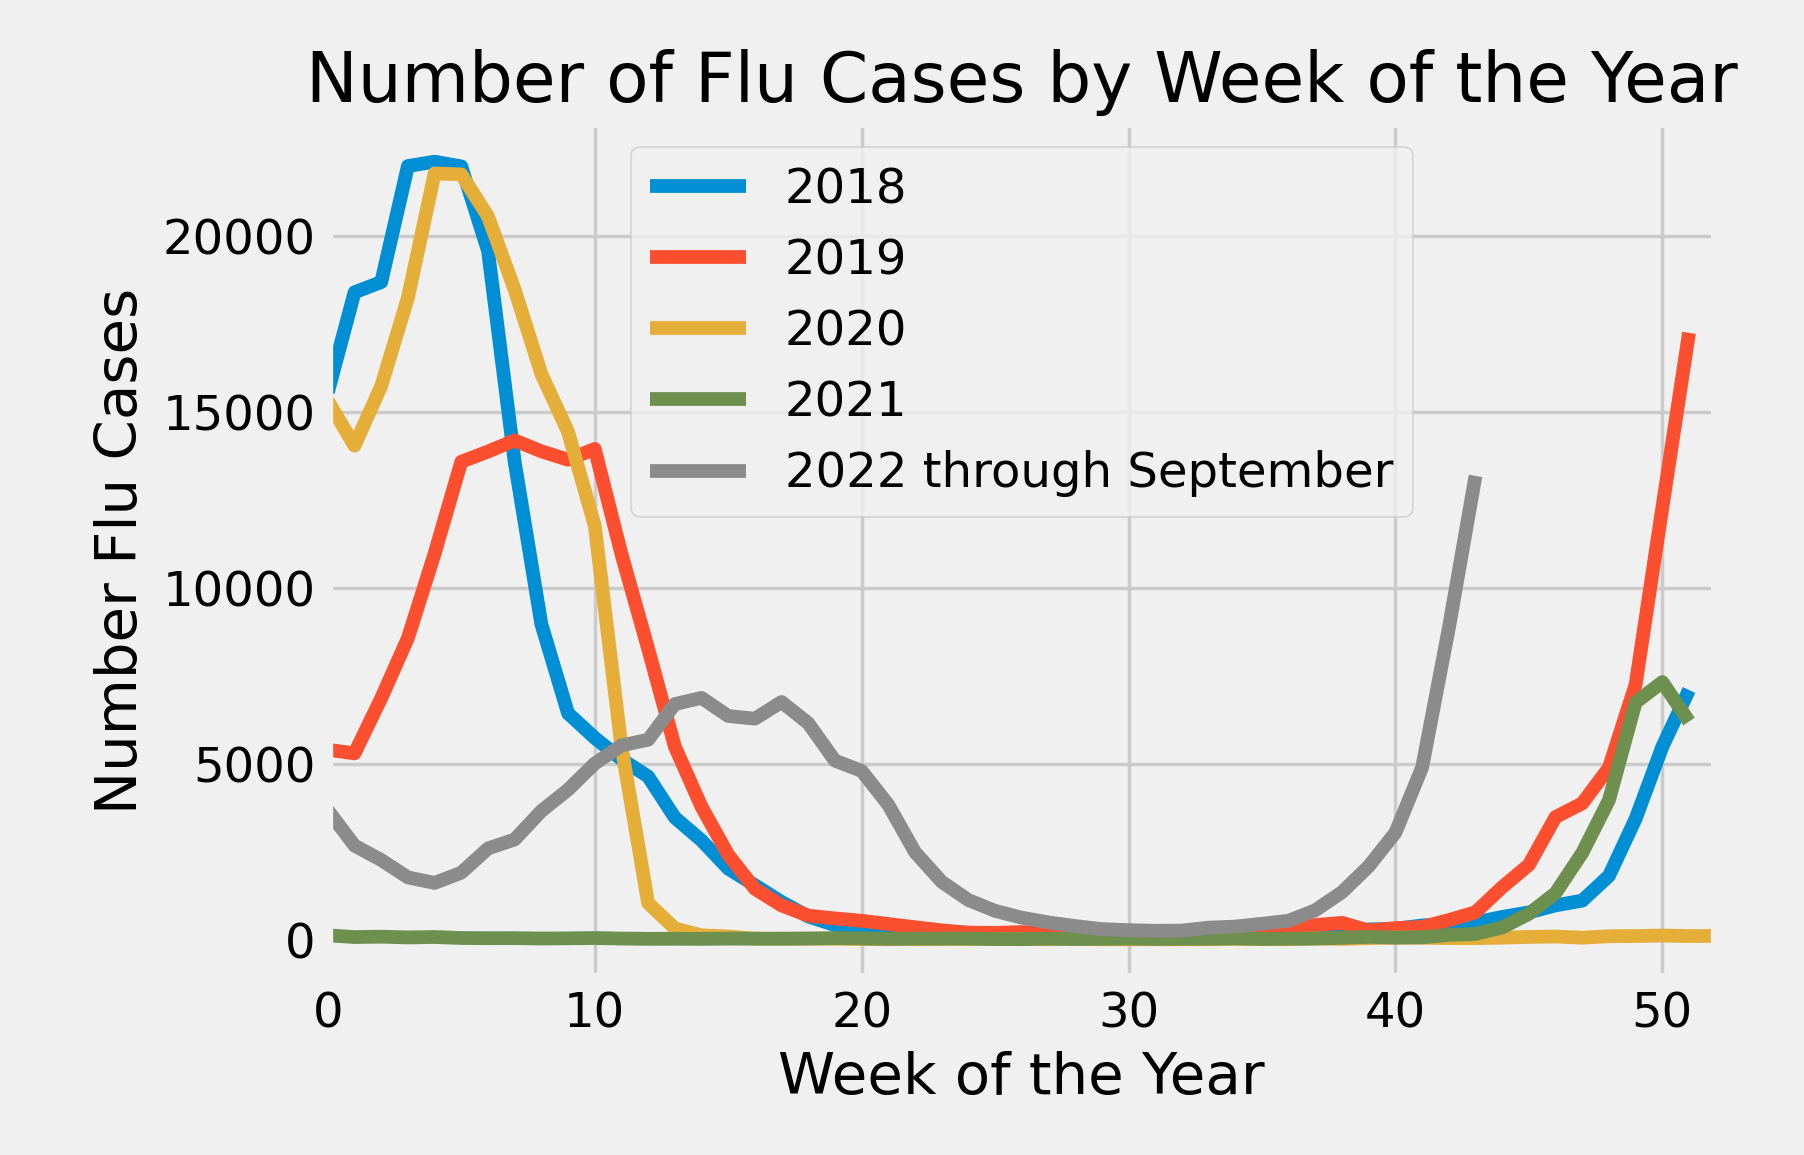

In [16]:
#Create line graph for each year flu cases as separate data series
plt.figure(2)
#Create x and y data series from dataframes
weeks=flu_2018["WEEK"]
total_2018=flu_2018["TOTAL"].reset_index(drop=True)
total_2019=flu_2019["TOTAL"].reset_index(drop=True)
total_2020=flu_2020["TOTAL"].reset_index(drop=True)
total_2021=flu_2021["TOTAL"].reset_index(drop=True)
total_2022=flu_2022["TOTAL"].reset_index(drop=True)
#plot each year data series
total_2018.plot.line(x=weeks,y=total_2018,label="2018")
total_2019.plot.line(x=weeks,y=total_2019,label="2019")
total_2020.plot.line(x=weeks,y=total_2020,label="2020")
total_2021.plot.line(x=weeks,y=total_2021,label="2021")
total_2022.plot.line(x=weeks,y=total_2022,label="2022 through September")
#Add labels and formatting
plt.legend(loc="best")

plt.xlabel("Week of the Year")
plt.ylabel("Number Flu Cases")
plt.title("Number of Flu Cases by Week of the Year")

plt.xlim(0,52)
plt.tight_layout()


This line chart demonstrates the seasonality of the flu, with the majority of cases occurring before March and after October.  The other trends that are apparent is the missing peak for the winter season of 2020 (green line) during the height of COVID.  Also what is apparent is the nearly flat line for the 2021 year with a small uptick near week 45.  Finally, you can see the delayed early season  peak in 2022, which is still smaller, but an earlier late year peak that is going on currently.

In [7]:
#Create a dataframe grouped by state of the states with least number of covid cases
flu_low_covid=flu_state[(flu_state["REGION"]=="Vermont")|(flu_state ["REGION"]=="Hawaii")\
|(flu_state ["REGION"]=="Maine")|(flu_state ["REGION"]=="Wyoming")|(flu_state ["REGION"]=="Arkansas")|\
(flu_state ["REGION"]=="New Hampshire")|(flu_state ["REGION"]=="Delaware")|(flu_state ["REGION"]=="Montana")|\
(flu_state ["REGION"]=="Rhode Island")|(flu_state ["REGION"]=="North Dakota")|(flu_state ["REGION"]=="West Virginia")]
flu_low_covid_by_state=flu_low_covid.groupby(["REGION"]).agg({"TOTAL":["sum"]}).reset_index()
flu_low_covid_by_state.columns=["REGION","TOTAL"]
flu_low_covid_by_state

,REGION,TOTAL
0,Arkansas,2223
1,Delaware,1386
2,Hawaii,1218
3,Maine,741
4,Montana,1333
5,New Hampshire,0
6,North Dakota,2752
7,Rhode Island,0
8,Vermont,1147
9,West Virginia,3056


In [8]:
#Create a dataframe grouped by state of the ten states with most number of covid cases
flu_high_covid=flu_state[(flu_state["REGION"]=="California")|(flu_state ["REGION"]=="Texas")\
|(flu_state ["REGION"]=="Florida")|(flu_state ["REGION"]=="Illinois")|(flu_state ["REGION"]=="Ohio")|\
(flu_state ["REGION"]=="Georgia")|(flu_state ["REGION"]=="Pennsylvania")|(flu_state ["REGION"]=="Tennessee")|\
(flu_state ["REGION"]=="North Carolina")|(flu_state ["REGION"]=="Wyoming")]
flu_high_covid["TOTAL"]
flu_high_covid_by_state=flu_high_covid.groupby(["REGION"]).agg({"TOTAL":["sum"]}).reset_index()
flu_high_covid_by_state.columns=["REGION","TOTAL"]
flu_high_covid_by_state

,REGION,TOTAL
0,California,15554
1,Florida,0
2,Georgia,5000
3,Illinois,2815
4,North Carolina,853
5,Ohio,21067
6,Pennsylvania,3861
7,Tennessee,323
8,Texas,18094
9,Wyoming,242


In [9]:
#merge low & high dataframes
low_and_high=pd.merge(flu_low_covid_by_state, flu_high_covid_by_state, on =["REGION","TOTAL"], how="outer")
low_and_high

,REGION,TOTAL
0,Arkansas,2223
1,Delaware,1386
2,Hawaii,1218
3,Maine,741
4,Montana,1333
5,New Hampshire,0
6,North Dakota,2752
7,Rhode Island,0
8,Vermont,1147
9,West Virginia,3056


<IPython.core.display.Javascript object>


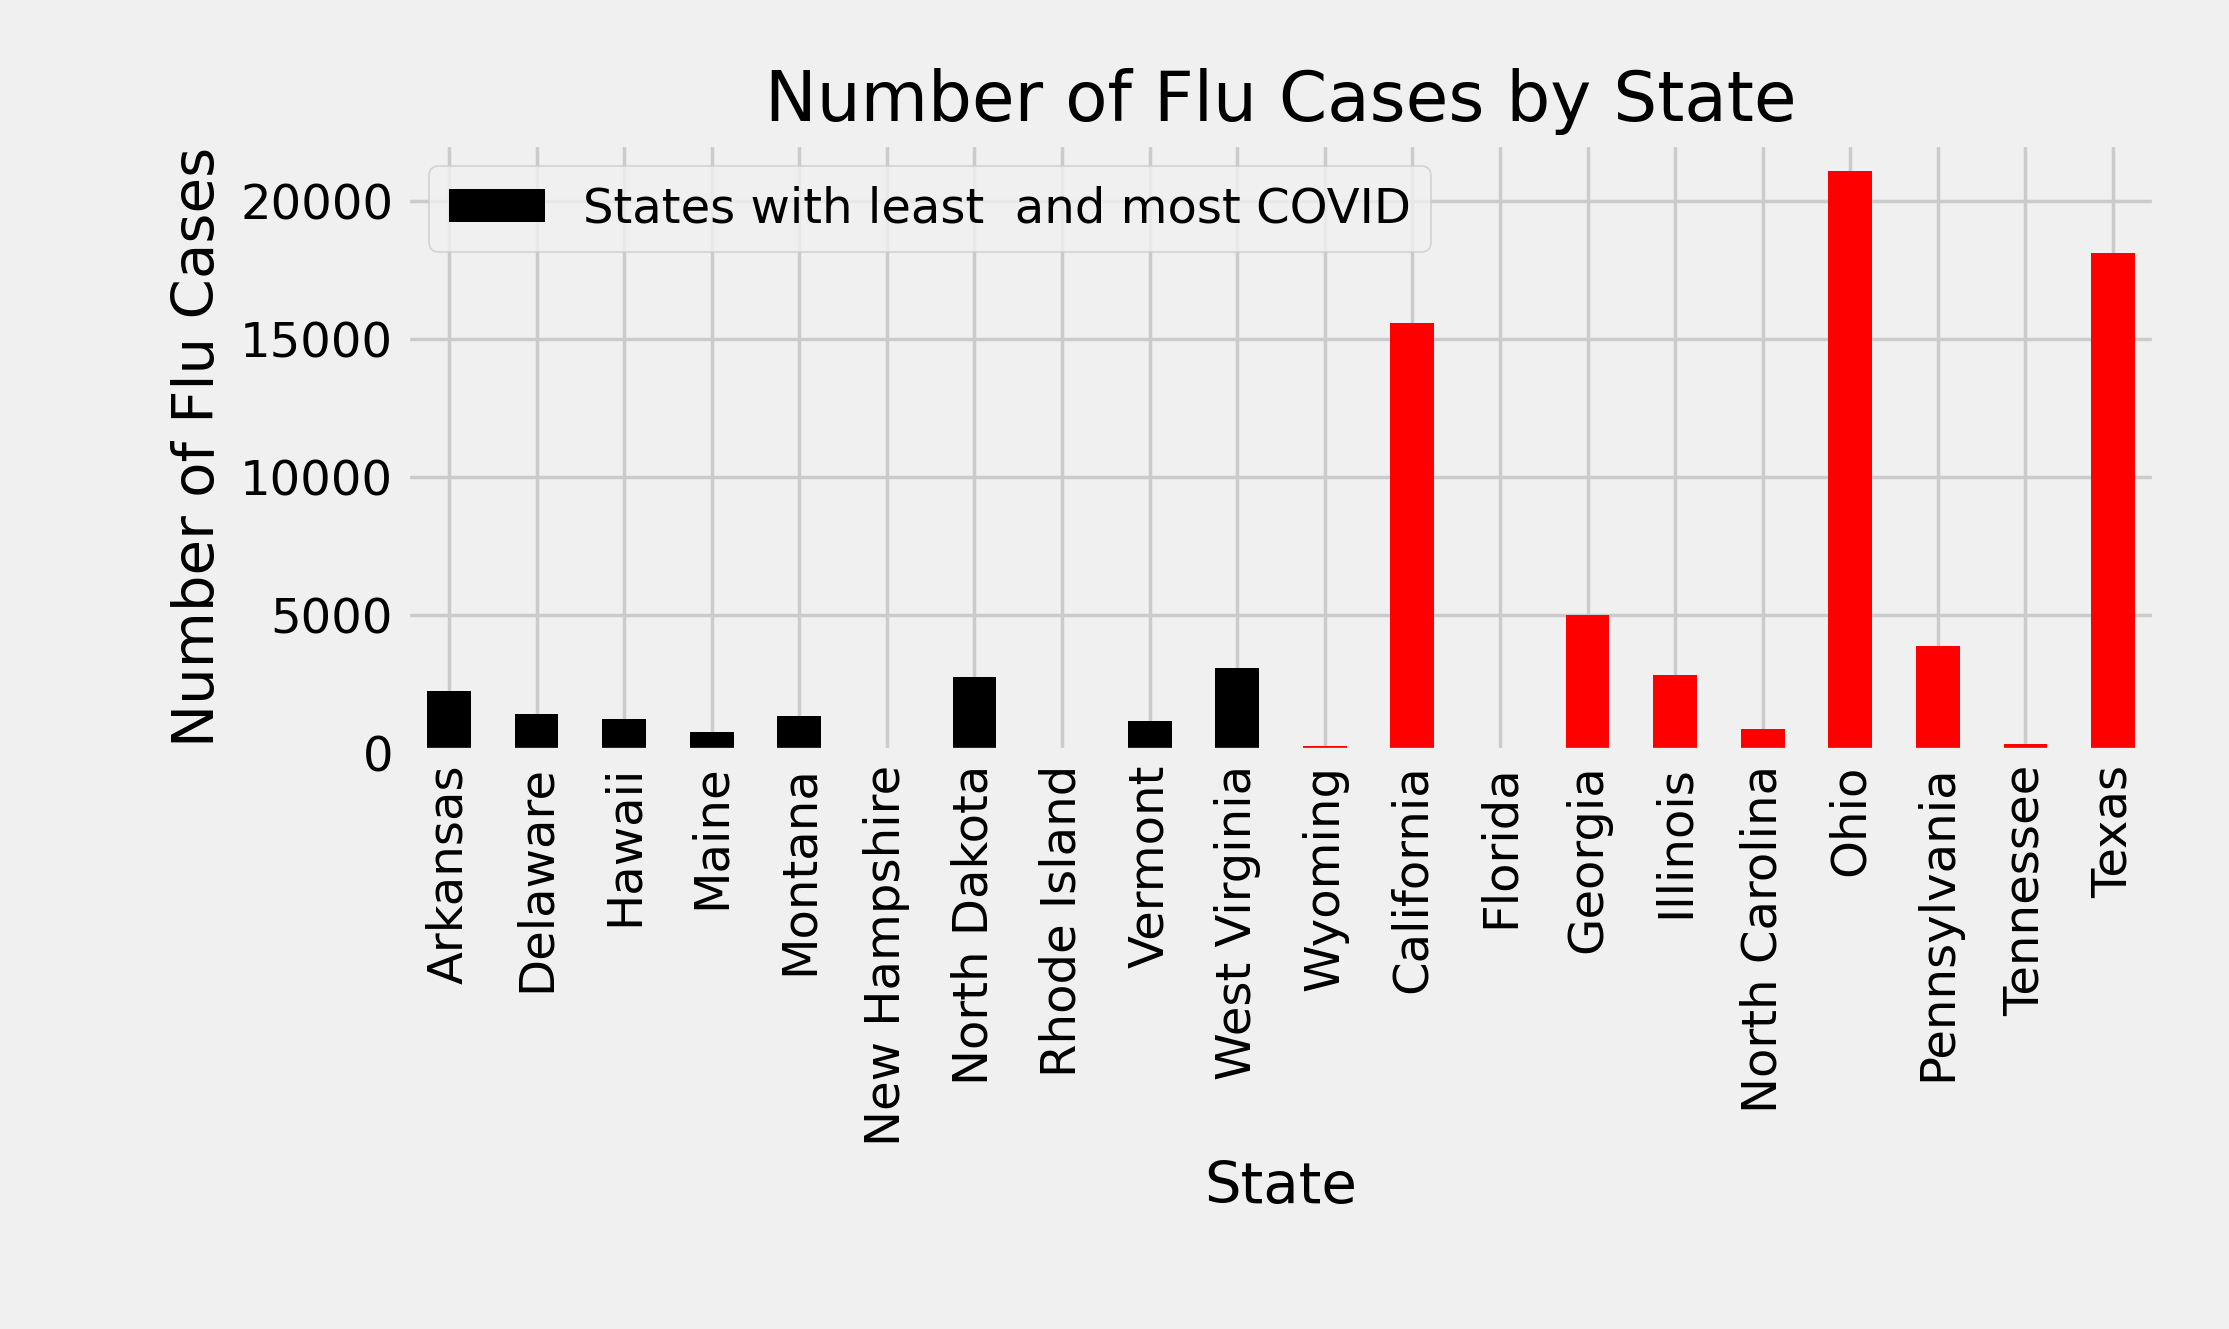

In [17]:

low_and_high.plot.bar(x="REGION",y="TOTAL",color=['black','black', 'black','black','black','black','black','black','black','black', 'red','red','red','red','red','red','red','red','red','red'])
plt.xticks(rotation="vertical")
plt.title("Number of Flu Cases by State")
plt.xlabel("State")
plt.ylabel("Number of Flu Cases")
plt.legend(["States with least  and most COVID","States with most COVID"],ncol=2)
plt.tight_layout()

This graph shows the number of flu cases that occured in the states with the fewest cases of COVID cases(black bars) and the number of flu cases in the states with the most COVID cases(red bars).  There appears to be a very moderate correlation with more flu cases in the states with more COVID cases, but this can most likley be explained due larger populations.  There does not seem to be any causal effect at the state level with greater COVID cases and the number of flu cases.